## Pandas V: Vectorized String Operations and Time Series

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

In [1]:
import numpy as np
import pandas as pd

### Vectorized String Operations
We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements

In [2]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This vectorization of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax

In [3]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

This is perhaps sufficient to work with some data, but it will break if there are any missing values

In [4]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the `str` attribute of Pandas `Series` and `Index` objects containing strings

In [5]:
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values

In [6]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Using tab completion on this `str` attribute will list all the vectorized string methods available to Pandas

### Tables of Pandas String Methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas `str` methods that mirror Python string methods

<div>
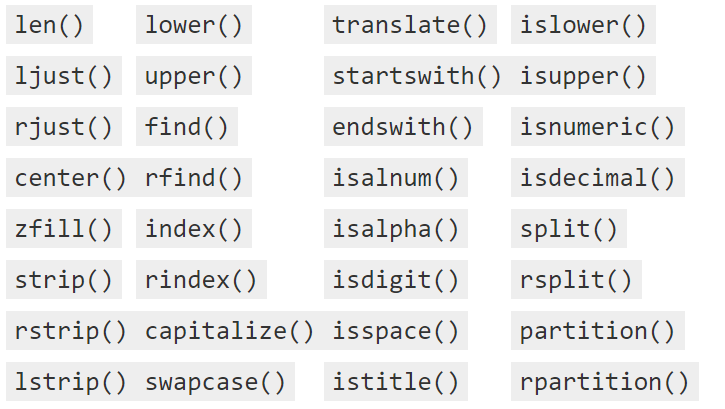
</div>

Notice that these have various return values. Some, like `lower()`, return a series of strings

In [7]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [8]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

But some others return numbers

In [9]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Or Boolean values

In [10]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Still others return lists or other compound values for each element

In [11]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods Using Regular Expressions
In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in `re` module

https://www.w3schools.com/python/python_regex.asp

<div>
<img src="attachment:f1.png" width="500" align="left"/>
</div>

With these, you can do a wide range of interesting operations. For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element

In [12]:
monte.str.extract('([A-Za-z]+)', expand = False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (`^`) and end-of-string (`$`) regular expression characters

In [13]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Another use case is to remove the `$` in front of the salary data in many of the datasets. For Example

`df[col] = pd.to_numeric(df[col].str.replace('[^.0-9]', ''))`

### Miscellaneous Methods
Below are some miscellaneous methods that enable other convenient operations

<div>
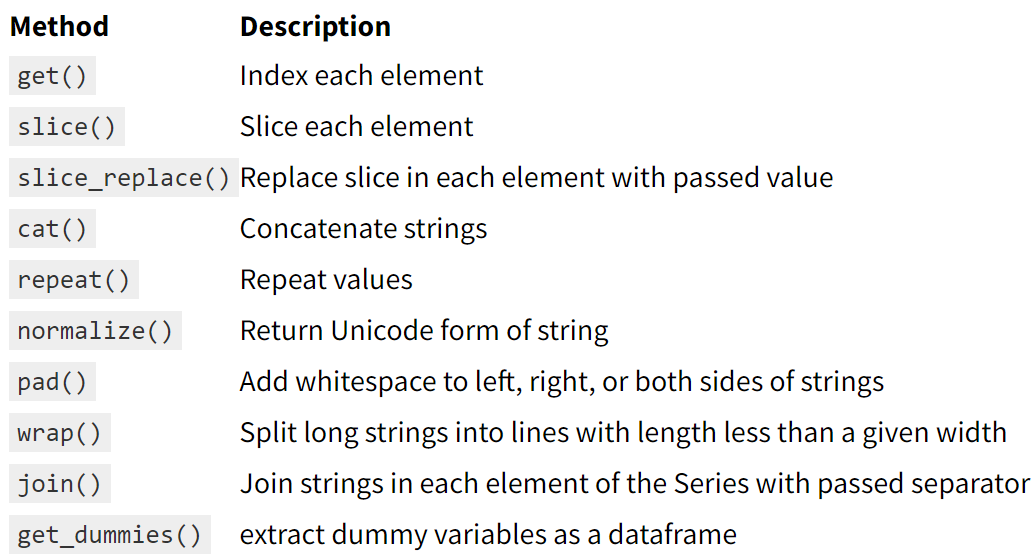
</div>

### Vectorized Item Access and Slicing
The `get()` and `slice()` operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python's normal indexing syntax–for example, `df.str.slice(0, 3)` is equivalent to `df.str[0:3]`

In [14]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via `df.str.get(i)` and `df.str[i]` is likewise similar. These `get()` and `slice()` methods also let you access elements of arrays returned by `split()`. For example, to extract the last name of each entry, we can combine `split()` and `get()`

In [15]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

### Indicator Variables
Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam"

In [16]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The `get_dummies()` routine lets you quickly split-out these indicator variables into a `DataFrame`

In [17]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### High-Performance Pandas: `eval()` and `query()`
As we've already seen in previous sections, the power of the PyData stack is built upon the ability of NumPy and Pandas to push basic operations into C via an intuitive syntax: examples are vectorized/broadcasted operations in NumPy, and grouping-type operations in Pandas. While these abstractions are efficient and effective for many common use cases, they often rely on the creation of temporary intermediate objects, which can cause undue overhead in computational time and memory use.

As of version 0.13, Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays. These are the `eval()` and `query()` functions

### `eval()`
The `eval()` function in Pandas uses string expressions to efficiently compute operations using DataFrames

In [18]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four DataFrames using the typical Pandas approach, we can just write the sum

In [19]:
df1 + df2 + df3 + df4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.456085,2.240325,2.189299,2.796486,0.997756,1.857199,0.836188,1.993636,3.384643,1.851474,...,1.405156,1.972001,3.018147,2.220360,3.010689,1.747911,2.386533,1.733311,1.431434,1.987172
1,1.930732,1.325833,2.100320,1.031509,2.216550,2.322945,2.221711,2.551356,1.446013,1.150052,...,1.295991,1.298014,2.191522,1.514702,1.013891,2.682375,2.355956,1.905342,2.432560,1.438647
2,2.961585,1.241173,1.292687,1.559529,3.244460,1.727601,1.508593,2.373529,1.092988,1.932929,...,1.857067,2.436111,2.279347,2.240607,2.450652,1.527546,2.098585,1.540268,1.685716,1.544752
3,1.325278,2.311100,3.153195,2.428513,2.468706,2.168389,1.036675,2.543273,1.985104,1.664177,...,2.248197,2.597650,1.624677,1.896175,1.075806,2.305705,3.019780,1.157161,3.050878,2.029253
4,1.107165,1.998018,2.171741,3.011473,2.403474,1.785172,1.148053,0.842213,3.165272,1.333032,...,2.001123,2.899136,1.595563,2.134547,2.112748,2.100429,2.224902,0.643061,2.949058,3.143277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.948321,1.751224,2.276621,2.203974,2.752196,1.811677,1.544824,1.347874,2.406432,2.045719,...,2.156290,1.469662,1.239475,2.085855,1.546402,2.670792,0.801108,1.924963,1.309836,2.598576
99996,2.249443,2.248954,2.840738,2.278969,1.552147,1.613808,2.537029,2.572771,1.855158,1.570820,...,1.528213,1.484577,1.659783,1.798531,1.920396,3.043902,1.965024,1.725764,1.465961,1.805480
99997,1.942065,2.352778,1.104218,1.777017,2.159435,1.715014,2.424385,2.013074,1.637694,3.488990,...,2.159156,2.096489,1.486934,2.669343,2.069421,1.332025,2.191244,2.179376,1.816149,1.682464
99998,2.681177,0.958664,2.867072,1.127300,1.277971,1.268119,1.756763,2.250528,1.326825,2.479023,...,1.608354,2.040729,2.223907,3.272577,1.933145,2.578746,1.132848,1.919029,2.201389,1.950606


The same result can be computed via `pd.eval` by constructing the expression as a `string`. The `eval()` version of this expression is about 50% faster (and uses much less memory), while giving the same result

In [20]:
pd.eval('df1 + df2 + df3 + df4')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.456085,2.240325,2.189299,2.796486,0.997756,1.857199,0.836188,1.993636,3.384643,1.851474,...,1.405156,1.972001,3.018147,2.220360,3.010689,1.747911,2.386533,1.733311,1.431434,1.987172
1,1.930732,1.325833,2.100320,1.031509,2.216550,2.322945,2.221711,2.551356,1.446013,1.150052,...,1.295991,1.298014,2.191522,1.514702,1.013891,2.682375,2.355956,1.905342,2.432560,1.438647
2,2.961585,1.241173,1.292687,1.559529,3.244460,1.727601,1.508593,2.373529,1.092988,1.932929,...,1.857067,2.436111,2.279347,2.240607,2.450652,1.527546,2.098585,1.540268,1.685716,1.544752
3,1.325278,2.311100,3.153195,2.428513,2.468706,2.168389,1.036675,2.543273,1.985104,1.664177,...,2.248197,2.597650,1.624677,1.896175,1.075806,2.305705,3.019780,1.157161,3.050878,2.029253
4,1.107165,1.998018,2.171741,3.011473,2.403474,1.785172,1.148053,0.842213,3.165272,1.333032,...,2.001123,2.899136,1.595563,2.134547,2.112748,2.100429,2.224902,0.643061,2.949058,3.143277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.948321,1.751224,2.276621,2.203974,2.752196,1.811677,1.544824,1.347874,2.406432,2.045719,...,2.156290,1.469662,1.239475,2.085855,1.546402,2.670792,0.801108,1.924963,1.309836,2.598576
99996,2.249443,2.248954,2.840738,2.278969,1.552147,1.613808,2.537029,2.572771,1.855158,1.570820,...,1.528213,1.484577,1.659783,1.798531,1.920396,3.043902,1.965024,1.725764,1.465961,1.805480
99997,1.942065,2.352778,1.104218,1.777017,2.159435,1.715014,2.424385,2.013074,1.637694,3.488990,...,2.159156,2.096489,1.486934,2.669343,2.069421,1.332025,2.191244,2.179376,1.816149,1.682464
99998,2.681177,0.958664,2.867072,1.127300,1.277971,1.268119,1.756763,2.250528,1.326825,2.479023,...,1.608354,2.040729,2.223907,3.272577,1.933145,2.578746,1.132848,1.919029,2.201389,1.950606


### Operations supported by `pd.eval()`
As of Pandas v0.16, `pd.eval()` supports a wide range of operations

- arithmetic operations
- comparison operations
- bitwise operations
- object attributes and indices

Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently not implemented in `pd.eval()`

In [21]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [22]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [23]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [24]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [25]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

### `DataFrame.eval()` for Column-Wise Operations
Just as Pandas has a top-level `pd.eval()` function, DataFrames have an `eval()` method that works in similar ways. The benefit of the `eval()` method is that columns can be referred to by name

In [26]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


Using `pd.eval()` as above, we can compute expressions with the three columns like this

In [27]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

The `DataFrame.eval()` method allows much more succinct evaluation of expressions with the columns. Notice here that we treat column names as variables within the evaluated expression

In [28]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

#### Assignment in `DataFrame.eval()`
In addition to the options just discussed, `DataFrame.eval()` also allows assignment to any column. We can use `df.eval()` to create a **new** column 'D' and assign to it a value computed from the other columns

In [29]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In the same way, any **existing** column can be modified

In [30]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


#### Local variables in `DataFrame.eval()`
The `DataFrame.eval()` method supports an additional syntax that lets it work with local Python variables

In [31]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The `@` character here marks a variable name rather than a column name, and lets you efficiently evaluate expressions involving the two "namespaces": the namespace of columns, and the namespace of Python objects. Notice that this `@` character is only supported by the `DataFrame.eval()` method, not by the `pandas.eval()` function, because the `pandas.eval()` function only has access to the one (Python) namespace

### `query()`
The `DataFrame` has another method based on evaluated strings, called the `query()` method

In [32]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

As with the example used in our discussion of `DataFrame.eval()`, this is an expression involving columns of the `DataFrame`. It cannot be expressed using the `DataFrame.eval()` syntax, however! Instead, for this type of filtering operation, you can use the `query()` method

In [33]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In addition to being a more efficient computation, compared to the masking expression this is much easier to read and understand. Note that the `query()` method also accepts the `@` flag to mark local variables

In [34]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

## Working with Time Series
Date and time data comes in a few flavors

- Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds)

### Dates and Times in Python
Python's basic objects for working with dates and times reside in the built-in `datetime` module. Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you can manually build a date using the `datetime` type

In [35]:
from datetime import datetime
datetime(year = 2016, month = 7, day = 4)

datetime.datetime(2016, 7, 4, 0, 0)

In [36]:
t1 = datetime.now()

In [37]:
t1.year

2022

In [38]:
t1.month

4

In [39]:
t1.day

3

In [40]:
t1.minute

57

Given a `datetime` instance, you can extract the equivalent `date` and `time` object by calling methods `date()` and `time()`

In [41]:
t1.date()

datetime.date(2022, 4, 3)

In [42]:
t1.time()

datetime.time(9, 57, 43, 98628)

The date contains year, month, day, hour, minute, second, and microsecond

Or, using the `dateutil` module, you can parse dates from a variety of string formats

In [43]:
from dateutil import parser
date = parser.parse("4th of July, 2016")
date

datetime.datetime(2016, 7, 4, 0, 0)

Once you have a `datetime` object, you can do things like printing the day of the week. The `datetime` object has a method for formatting date objects into readable strings. The method is called `strftime()`, and takes one parameter, format, to specify the format of the returned string

In [44]:
date.strftime('%A')

'Monday'

In [45]:
date.strftime('%m/%d/%Y %H:%M')

'07/04/2016 00:00'

In the above lines, we've used one of the standard string format codes for printing Weekday `("%A")`, Two-digit month `(%m)`, Two-digit day `(%d)`, Four-digit Year `(%Y)`, Two-digit Year `(%y)`, Hour 24-hour clock `(%H)`, Two-digit minute `(%M)`, Second `(%S)`, AM/PM `(%p)`, timezone, `(%Z)`, local version of date `(%x)`, local version of time `(%X)`. Strings can be converted (parsed) into `datetime` objects with the `strptime` function

In [46]:
datetime.strptime('20211231', '%Y%m%d')

datetime.datetime(2021, 12, 31, 0, 0)

In [47]:
datetime.strptime('2021-12-31', '%Y-%m-%d')

datetime.datetime(2021, 12, 31, 0, 0)

The difference of two `datetime` objects produces a `datetime.timedelta` type

In [48]:
t1 = datetime.now()
t2 = datetime(2021, 12, 31)

In [49]:
delta = t1 - t2
delta

datetime.timedelta(days=93, seconds=35885, microseconds=607850)

In [51]:
type(delta)

datetime.timedelta

### NumPy's `datetime64`
The weaknesses of Python's `datetime` format inspired the NumPy team to add a set of native time series data type to NumPy. The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The `datetime64` requires a very specific input format.

The date units are years (`Y`), months (`M`), weeks (`W`), and days (`D`), while the time units are hours (`h`), minutes (`m`), seconds (`s`), milliseconds (`ms`), etc. The `datetime64` data type also accepts the string `NAT`, in any combination of lowercase/uppercase letters, for a “Not A Time” value

In [52]:
date = np.array('2016-07-04', dtype=np.datetime64)
date

array('2016-07-04', dtype='datetime64[D]')

In [53]:
np.datetime64('2016-07-04')

numpy.datetime64('2016-07-04')

Once we have this date formatted, however, we can quickly do vectorized operations on it

In [54]:
date + np.arange(12)

array(['2016-07-04', '2016-07-05', '2016-07-06', '2016-07-07',
       '2016-07-08', '2016-07-09', '2016-07-10', '2016-07-11',
       '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15'],
      dtype='datetime64[D]')

### Dates and Times in Pandas
Pandas builds upon all the tools just discussed to provide a `Timestamp` object, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`. From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`

In [55]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [56]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object

In [57]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a `Series` object that has time indexed data

In [58]:
index = pd.DatetimeIndex(['2014-07-04', '2014-07-08', '2014-08-04', '2014-08-05', '2014-08-08',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3, 4, 5, 6], index = index)
data

2014-07-04    0
2014-07-08    1
2014-08-04    2
2014-08-05    3
2014-08-08    4
2015-07-04    5
2015-08-04    6
dtype: int64

Now that we have this data in a Series, we can make use of any of the `Series` indexing patterns we discussed in previous sections, passing values that can be coerced into dates. Time series behaves like any other Pandas Series when you are indexing and selecting data based on label. As a convenience, you can pass a string that is interpretable as a date

In [59]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-07-08    1
2014-08-04    2
2014-08-05    3
2014-08-08    4
2015-07-04    5
dtype: int64

Beause most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query

In [60]:
data['2014-07-06':'2014-08-06']

2014-07-08    1
2014-08-04    2
2014-08-05    3
dtype: int64

Remember that slicing in this manner produces a view on the source time series like slicing NumPy arrays. This means that no data is copied and modifications on the slice will be reflected in the orginal data.

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year. A year and month to obtain a slice of all data from that year and month

In [61]:
data['2015']

2015-07-04    5
2015-08-04    6
dtype: int64

In [62]:
data['2014-08']

2014-08-04    2
2014-08-05    3
2014-08-08    4
dtype: int64

Like other Series, arithmetic operations between different indexed time series automatically align on the dates

In [63]:
data[::2]

2014-07-04    0
2014-08-04    2
2014-08-08    4
2015-08-04    6
dtype: int64

In [64]:
data + data[::2]

2014-07-04     0.0
2014-07-08     NaN
2014-08-04     4.0
2014-08-05     NaN
2014-08-08     8.0
2015-07-04     NaN
2015-08-04    12.0
dtype: float64

There is an equivalent instance method `truncate` that slices a Series between two dates

`Series.truncate(before = None, after = None, axis = None, copy = True)`

- `before`: Truncate all rows before this index value
- `after`: Truncate all rows after this index value
- `axis`: {0 or 'index', 1 or 'columns'}, optional. Axis to truncate. Truncates the index (rows) by default
- `copy`: Return a copy of the truncated section

In [65]:
data.truncate(after = '2014-08-10')

2014-07-04    0
2014-07-08    1
2014-08-04    2
2014-08-05    3
2014-08-08    4
dtype: int64

All of this holds true for `DataFrame` as well

In [66]:
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = dates,
                       columns = ['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.435865,-0.739256,0.509777,0.073217
2000-01-12,-0.480713,-0.556015,0.575555,-0.371615
2000-01-19,-0.794885,0.211496,-0.746636,-0.042340
2000-01-26,-0.584569,0.789539,-0.571413,0.563751
2000-02-02,-0.390542,0.001069,-0.330312,1.213486


In [67]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.502633,-0.104496,1.404534,-1.285451
2001-05-09,3.980014,-0.255014,0.255488,0.234829
2001-05-16,0.046924,-0.050887,-0.557372,2.245273
2001-05-23,1.000704,1.207720,0.478767,-2.261301
2001-05-30,0.883406,-1.437094,-0.397131,-0.229754


### Time Series with Duplicated Indices
In some applications, there may be multiple data observations falling on a particular timestamp

In [68]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its `is_unique` attribute

In [69]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated or not

In [70]:
dup_ts['1/3/2000']  # not duplicated

4

In [71]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to aggregate the data in a time series with duplicated timestamps. One way to do this is to use `groupby` and pass `level = 0`

In [72]:
grouped = dup_ts.groupby(level = 0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [73]:
grouped.count() # use size () is ok too

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Pandas Time Series Data Structures
- For time stamps, Pandas provides the `Timestamp` type. A `Timestamp` can be substituted anywhere you would use a `datetime` object. As mentioned before, it is essentially a replacement for Python's native `datetime`, but is based on the more efficient `numpy.datetime64` data type. The associated Index structure is `DatetimeIndex`
- For time Periods, Pandas provides the `Period` type. This encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index structure is `PeriodIndex`
- For time deltas or durations, Pandas provides the `Timedelta` type. Timedelta is a more efficient replacement for Python's native `datetime.timedelta` type, and is based on `numpy.timedelta64`. The associated index structure is `TimedeltaIndex`

The most fundamental of these date/time objects are the `Timestamp` and `DatetimeIndex` objects. While these class objects can be invoked directly, it is more common to use the `pd.to_datetime()` function, which can parse a wide variety of formats. Passing a single date to `pd.to_datetime()` yields a `Timestamp`; passing a series of dates by default yields a `DatetimeIndex`

In [74]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a PeriodIndex with the `to_period()` function with the addition of a frequency code. Here we'll use `'D'` to indicate daily frequency.

- `D`: day
- `h`: hour
- `m`: minute
- `s`: second
- `ms`: millisecond
- `us`: microsecond
- `ns`: nanosecond    

In [75]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A `TimedeltaIndex` is created, for example, when a date is subtracted from another

In [76]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular Sequences: `pd.date_range()`
To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: `pd.date_range()` for timestamps, `pd.period_range()` for periods, and `pd.timedelta_range()` for time deltas. We've seen that Python's `range()` and NumPy's `np.arange()` turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, `pd.date_range()` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day. `pd.date_range` is responsible for generating a `DatatimeIndex` with an indicated length according to a particular frequency

In [77]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

By default, `pd.date_range` generates daily timestamps. If you pass only a start or end date, you must pass a number of periods to generate

In [78]:
pd.date_range(start = '2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range(end = '2012-06-01', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index. For example, if you wanted a date index containing the last business day of each month, you would pass the `BM` frequency and only dates falling on or inside the date interval will be included

In [80]:
pd.date_range('2000-01-01', '2000-12-01', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

The spacing can be modified by altering the `freq` argument, which defaults to D. For example, here we will construct a range of hourly timestamps

In [81]:
pd.date_range('2015-07-03', periods = 8, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

`pd.date_range` by default preserves the time (if any) of the start or end timestamp

In [82]:
pd.date_range('2019-05-03 12:56:31', periods = 6)

DatetimeIndex(['2019-05-03 12:56:31', '2019-05-04 12:56:31',
               '2019-05-05 12:56:31', '2019-05-06 12:56:31',
               '2019-05-07 12:56:31', '2019-05-08 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but wantto generate a setof timestamps normalized to midnight as a convention. To do this, set the `normalize = True`

In [83]:
pd.date_range('2019-05-03 12:56:31', periods = 6, normalize = True)

DatetimeIndex(['2019-05-03', '2019-05-04', '2019-05-05', '2019-05-06',
               '2019-05-07', '2019-05-08'],
              dtype='datetime64[ns]', freq='D')

To create regular sequences of `Period` or `Timedelta` values, the very similar `pd.period_range()` and `pd.timedelta_range()` functions are useful

In [84]:
pd.period_range('2015-07', periods = 8, freq = 'M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

And a sequence of durations increasing by an hour

In [85]:
pd.timedelta_range(0, periods = 10, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets
Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the `D` (day) and `H` (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available

<div>
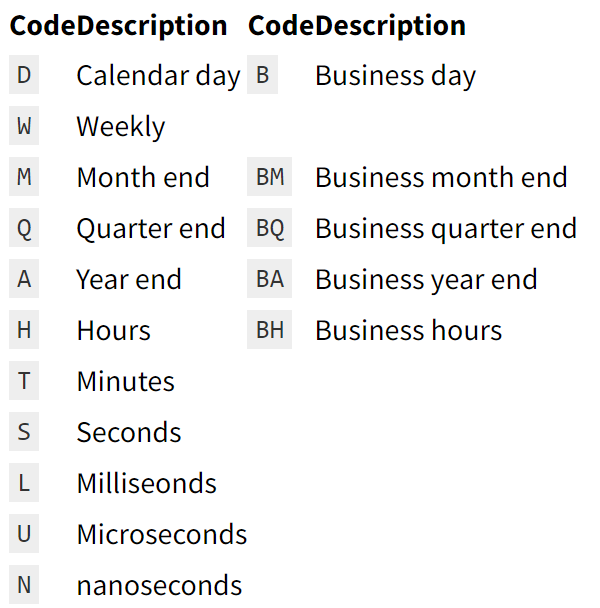
</div>

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an `S` suffix to any of these, they instead will be marked at the beginning

<div>
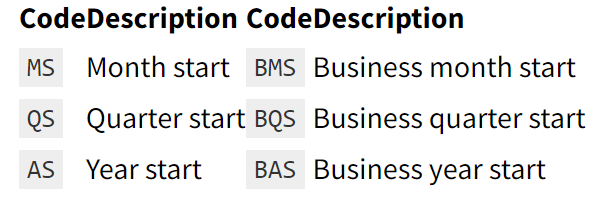
</div>

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- `Q-JAN, Q-FEB`, etc, QuarterEnd, quarterly dates anchored on last calendar day of each month, for year ending in indicated month
- `BQ-JAN, BQ-FEB`, etc, BusinessQuarterEnd, quarterly dates anchored on last weekday of each month, for year ending in indicated month
- `QS-JAN, QS-FEB`, etc, QuarterBegin, quarterly dates anchored on first calendar day of each month, for year ending in indicated month
- `BQS-JAN, BQS-FEB`, etc, BusinessQuarterBegin, quarterly dates anchored on first weekday of each month, for year ending in indicated month
- `A-JAN, A-FEB`, etc, YearEnd, annual dates anchored on last calendar day of given month
- `BA-JAN, BA-FEB`, etc, BusinessYearEnd, annual dates anchored on last weekday of given month
- `AS-JAN, AS-FEB`, etc, YearBegin, annual dates anchored on first calendar day of given month
- `BAS-JAN, BAS-FEB`, etc, BusinessYearBegin, annual dates anchored on first weekday of given month

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- `W-SUN, W-MON, W-TUE, W-WED`, etc, Week, weekly on given day of week
- `WOM-1MON, WOM-2MON`, etc, WeekOfMonth, generate weekly dates in the first, second, their or fourth week of the month (e.g., `WOM-3FRI` for the third Friday of each month)

In [86]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq = 'WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

On top of this, codes can be combined with numbers to specify other frequencies. Frequencies in Pandas are composed of a base frequency and a multiplier. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (`H`) and minute (`T`) codes as follows

In [87]:
pd.date_range('2000-01-01', periods = 10, freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [88]:
pd.timedelta_range(0, periods = 9, freq = "2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

ll of these short codes refer to specific instances of Pandas time series offsets, which can be found in the `pd.tseries.offsets` module. For example, we can create a business day offset directly as follows

In [89]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods = 5, freq = BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [90]:
pd.date_range('2015-07-01', periods = 5, freq = 'B')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

Some frequencies describe points in time that are not evenly spaced. For example, `M` (calendar month end) and `BM` (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as anchored offsets

### Shifting Data
Shifting refers to moving data backward and forward through time. Both `Series` and `DataFrame` have a `shift` method for doing shifts forward or backward, leaving the time index unmodified

In [91]:
ts = pd.Series(np.random.randn(6),
               index=pd.date_range('1/1/2000', periods = 6, freq = 'M'))
ts

2000-01-31   -1.135422
2000-02-29   -1.730953
2000-03-31    1.182227
2000-04-30    1.417132
2000-05-31    1.543275
2000-06-30    0.216183
Freq: M, dtype: float64

In [92]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.135422
2000-04-30   -1.730953
2000-05-31    1.182227
2000-06-30    1.417132
Freq: M, dtype: float64

In [93]:
ts.shift(-2)

2000-01-31    1.182227
2000-02-29    1.417132
2000-03-31    1.543275
2000-04-30    0.216183
2000-05-31         NaN
2000-06-30         NaN
Freq: M, dtype: float64

When we shift like this, missing data is introduced either at the start or the end of the time series. A common use of `shift` is computing percent changes in a time series or multiple time series as DataFrame columns

In [94]:
ts / ts.shift(1) - 1 # calculate the percentage of change betweem m2 and m1, e.g. (m2 - m1) / m1

2000-01-31         NaN
2000-02-29    0.524502
2000-03-31   -1.682992
2000-04-30    0.198698
2000-05-31    0.089013
2000-06-30   -0.859920
Freq: M, dtype: float64

Because naive shift leave the index unmodified, some data is discarded. Therefore, if the frequency is known, it can be passed to `shift` to advance the timestamps instead of simply the data

In [95]:
ts.shift(2, freq = 'M')

2000-03-31   -1.135422
2000-04-30   -1.730953
2000-05-31    1.182227
2000-06-30    1.417132
2000-07-31    1.543275
2000-08-31    0.216183
Freq: M, dtype: float64

In [ ]:
Other frequencies can be passed too, giving you some flexibility in how to lead and lag the data

In [96]:
ts.shift(3, freq = 'D')

2000-02-03   -1.135422
2000-03-03   -1.730953
2000-04-03    1.182227
2000-05-03    1.417132
2000-06-03    1.543275
2000-07-03    0.216183
dtype: float64

In [97]:
ts.shift(1, freq = '90T')

2000-01-31 01:30:00   -1.135422
2000-02-29 01:30:00   -1.730953
2000-03-31 01:30:00    1.182227
2000-04-30 01:30:00    1.417132
2000-05-31 01:30:00    1.543275
2000-06-30 01:30:00    0.216183
dtype: float64

The `T` here stands for minutes. Note that the `freq` option here indicates the offset to be applied to the first timestamp, but it does not change the underlying frequency of the data, if any

### Periods and Period Arithmetic
Periods represent timespans, like days, months, quarters or years. The `Period` class represents this data type, requiring a string or integer and a frequency we discussed above

In [98]:
p = pd.Period(2021, freq = 'A-DEC')
p

Period('2021', 'A-DEC')

In this case, the `Period` object represents the full timespan from January 1, 2021 to December 31, 2021. Conveninetly, adding and subtracting integers from periods has the effect of shifting by their frequency

In [99]:
p + 5

Period('2026', 'A-DEC')

In [100]:
p - 5 

Period('2016', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them

In [101]:
pd.Period('2029', freq = 'A-DEC') - p

<8 * YearEnds: month=12>

Regular ranges of periods can be constructed with the `pd.period_range` method

In [102]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

The `PeriodIndex` class stores a sequence of periods and can be used as an axis index in any Pandas data structure

In [103]:
pd.Series(np.random.randn(6), index = rng)

2000-01   -0.372172
2000-02   -0.598059
2000-03    1.714150
2000-04   -1.485959
2000-05   -1.602976
2000-06    0.495303
Freq: M, dtype: float64

If you have an array of strings, you can aslo use the `PeriodIndex` class to convert it into a `PeriodIndex` object

In [104]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion
Periods and `PeriodIndex` objects can be converted to another frequency with their `asfreq` method. As an example, suppose we have an annual period and want to convert it into a monthly period either at the start or end of the year.

`Period.asfreq()`: Convert Period to desired frequency, at the start or end of the interval
- `freq`: The desired frequency
- `how`: {'E', 'S', 'end', 'start'}, default 'end'. Start or end of the timespan.

In [105]:
p = pd.Period('2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [106]:
p.asfreq('M', how = 'start') # pay attention to the new freq

Period('2007-01', 'M')

In [107]:
p.asfreq('M', how = 'end')

Period('2007-12', 'M')

<div>
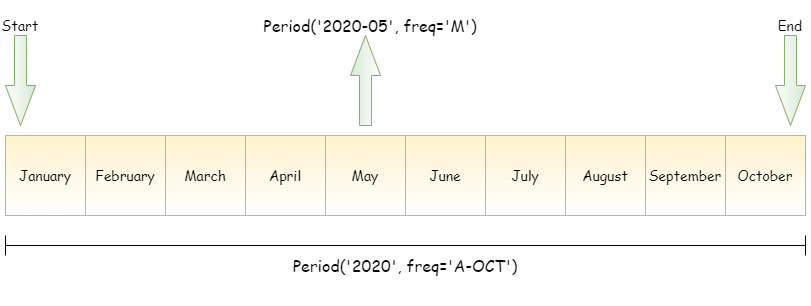
</div>

You can think of `Period('2007', 'A-DEC')` as being a sort of cursor pointing to a span of time, subdivided by monthly period. For a fiscal year ending on a month other than December, the corresponding monthly subperiods are different

In [108]:
p = pd.Period('2007', freq = 'A-JUN')
p

Period('2007', 'A-JUN')

In [109]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [110]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from high to low frequency, Pandas determine the super-period depending on where the subperiod belongs. For example, in `A-JUN` frequency, the month `AUG-2007` is actually part of the 2008 period

In [111]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole `PeriodIndex` objects  or time series can be similarly converted with the same semantics

In [112]:
rng = pd.period_range('2006', '2009', freq = 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006   -0.509205
2007    0.725911
2008   -1.562775
2009   -0.136029
Freq: A-DEC, dtype: float64

In [113]:
ts.asfreq('M', how = 'start')

2006-01   -0.509205
2007-01    0.725911
2008-01   -1.562775
2009-01   -0.136029
Freq: M, dtype: float64

Here, the annual periods are replaced with monthly periods corresponding to the first month falling within each annual period. If we instead wanted the last business day of each year, we can use the `B` frequency and indicate that we wanted the end of the period

In [114]:
ts.asfreq('B', how = 'end')

2006-12-29   -0.509205
2007-12-31    0.725911
2008-12-31   -1.562775
2009-12-31   -0.136029
Freq: B, dtype: float64

### Quarterly Period Frequencies
Quarterly data is standard in accounting, finance and other fields. Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. This the period `2012Q4` has a different meaning depending on fiscal year end. Pandas supports all 12 possible quarterly frequencies as `Q-JAN` through `Q-DEC`

In [115]:
p = pd.Period('2012Q4', freq = 'Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency

In [116]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [117]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Therefore, it is possible to do easy period arithmetic. For example, to get the timestamp at 4PM on the second-to-last business day of the quarter, you could do

In [118]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [119]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

You can generate quarterly ranges using `period_range`

In [120]:
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index = rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [121]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods
`Series` and `DataFrame` objects indexed by timestamps can be converted to periods with the `to_period` method

In [122]:
rng = pd.date_range('2000-01-01', periods = 3, freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
ts

2000-01-31    1.718203
2000-02-29   -0.232192
2000-03-31   -0.062628
Freq: M, dtype: float64

In [123]:
pts = ts.to_period()
pts

2000-01    1.718203
2000-02   -0.232192
2000-03   -0.062628
Freq: M, dtype: float64

Since periods refer to non-overlapping tmespans, a timestamp can only belong to a single period for a given frquency. While the frequency of the new `PeriodIndex` is inferred from the timestamps by default, you can specify any frequency you want. There is also no problem with having duplicate periods in the result

In [124]:
rng = pd.date_range('1/29/2000', periods=6, freq = 'D')
ts2 = pd.Series(np.random.randn(6), index = rng)
ts2

2000-01-29   -0.161448
2000-01-30    0.130484
2000-01-31   -0.730082
2000-02-01   -0.080795
2000-02-02    0.850913
2000-02-03   -0.776767
Freq: D, dtype: float64

In [125]:
ts2.to_period('M')

2000-01   -0.161448
2000-01    0.130484
2000-01   -0.730082
2000-02   -0.080795
2000-02    0.850913
2000-02   -0.776767
Freq: M, dtype: float64

To convert back to timestamps, use `to_timestamp`

In [126]:
type(ts2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [127]:
pts = ts2.to_period()
pts

2000-01-29   -0.161448
2000-01-30    0.130484
2000-01-31   -0.730082
2000-02-01   -0.080795
2000-02-02    0.850913
2000-02-03   -0.776767
Freq: D, dtype: float64

In [128]:
type(pts.index)

pandas.core.indexes.period.PeriodIndex

In [129]:
pts.to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999   -0.161448
2000-01-30 23:59:59.999999999    0.130484
2000-01-31 23:59:59.999999999   -0.730082
2000-02-01 23:59:59.999999999   -0.080795
2000-02-02 23:59:59.999999999    0.850913
2000-02-03 23:59:59.999999999   -0.776767
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays
Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns. For example, in this macroeconomic dataset, the year and quarter are in different columns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')
data.head(5)

By passing these columns to `PeriodIndex` with a frequency, you can combine them to form an index for the DataFrame

In [ ]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter,
                       freq = 'Q-DEC')
index

In [ ]:
data.index = index
data.head()

### Resampling and Windowing
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling. Pandas objects are equipped with `resample` method which has a similar API to `groupby`. You can `resample` to group the data, then call an aggregation function.

`Series.resample(rule, axis = 0, closed = None, label = None, convention = 'start', kind = None, loffset = None, base = None, on = None, level = None, origin = 'start_day', offset = None)`

- `freq`: string or DateOffset indicating desired resampled frequency (e.g., 'M', '5min')
- `axis`: axis to resample on (default `axis = 0`)
- `kind`: aggregate to period ('period') or timestamps ('timestamp'). Defaults to the type of index the time series has
- `closed`: {‘right’, ‘left’}. Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’
- `label`: {‘right’, ‘left’}. Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’
- `convention`: {'start', 'end', 's', 'e'}, default 'start'. For PeriodIndex only, controls whether to use the start or end of rule
- `loffset`: timedelta, adjust the resampled time labels


In [ ]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

In [ ]:
ts.resample('M').mean()

In [ ]:
ts.resample('M', kind = 'period').mean()

In [ ]:
ts.resample('M').agg(['mean', 'std'])

### Downsampling
Aggregating data to a regular, lower frequency is a pretty normal time series task. The data you are aggregating doesn't need to be fixed frequently. The desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one month intervals. Each interval is said to be half-open. A data point can only belong to one interval, and the union of the intervals must take up the whole time frame. There are several things to think about when using `resample` to downsample teh data

- which side of each interval is clsoed
- how to label each aggregated bin, either with the start of the interval or the end

In [ ]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

Suppose you wanted to aggregate this data into five-minute chunks by taking the sum of each group

In [ ]:
ts.resample('3min').sum()

In [ ]:
ts.resample('3min', label = 'right').sum()

In [ ]:
ts.resample('3min', closed = 'right').sum()

The frequency you pass defines bin edges in five-minute increments. By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval. Passing `closed = right` changes the interval to be closed on the right. The resulting time series is labeled by the timestamps from the left side of each bin. By passing `label = right`, you can label them with the right bin edge

In [ ]:
ts.resample('3min', closed = 'right', label = 'right').sum()

Finally, you may want to shift the result index by some amount, say add two seconds from the left edge. To do this, pass a string or data offset to `loffset`

In [ ]:
ts.resample('3min', loffset = '2T').sum()

You also could have accomplished the effect of `loffset` by calling the `shift` method on the result without `loffset`

In [ ]:
ts.resample('3min').sum().shift(freq = '2T')

credit: https://stackoverflow.com/questions/48340463/how-to-understand-closed-and-label-arguments-in-pandas-resample-method

<div>
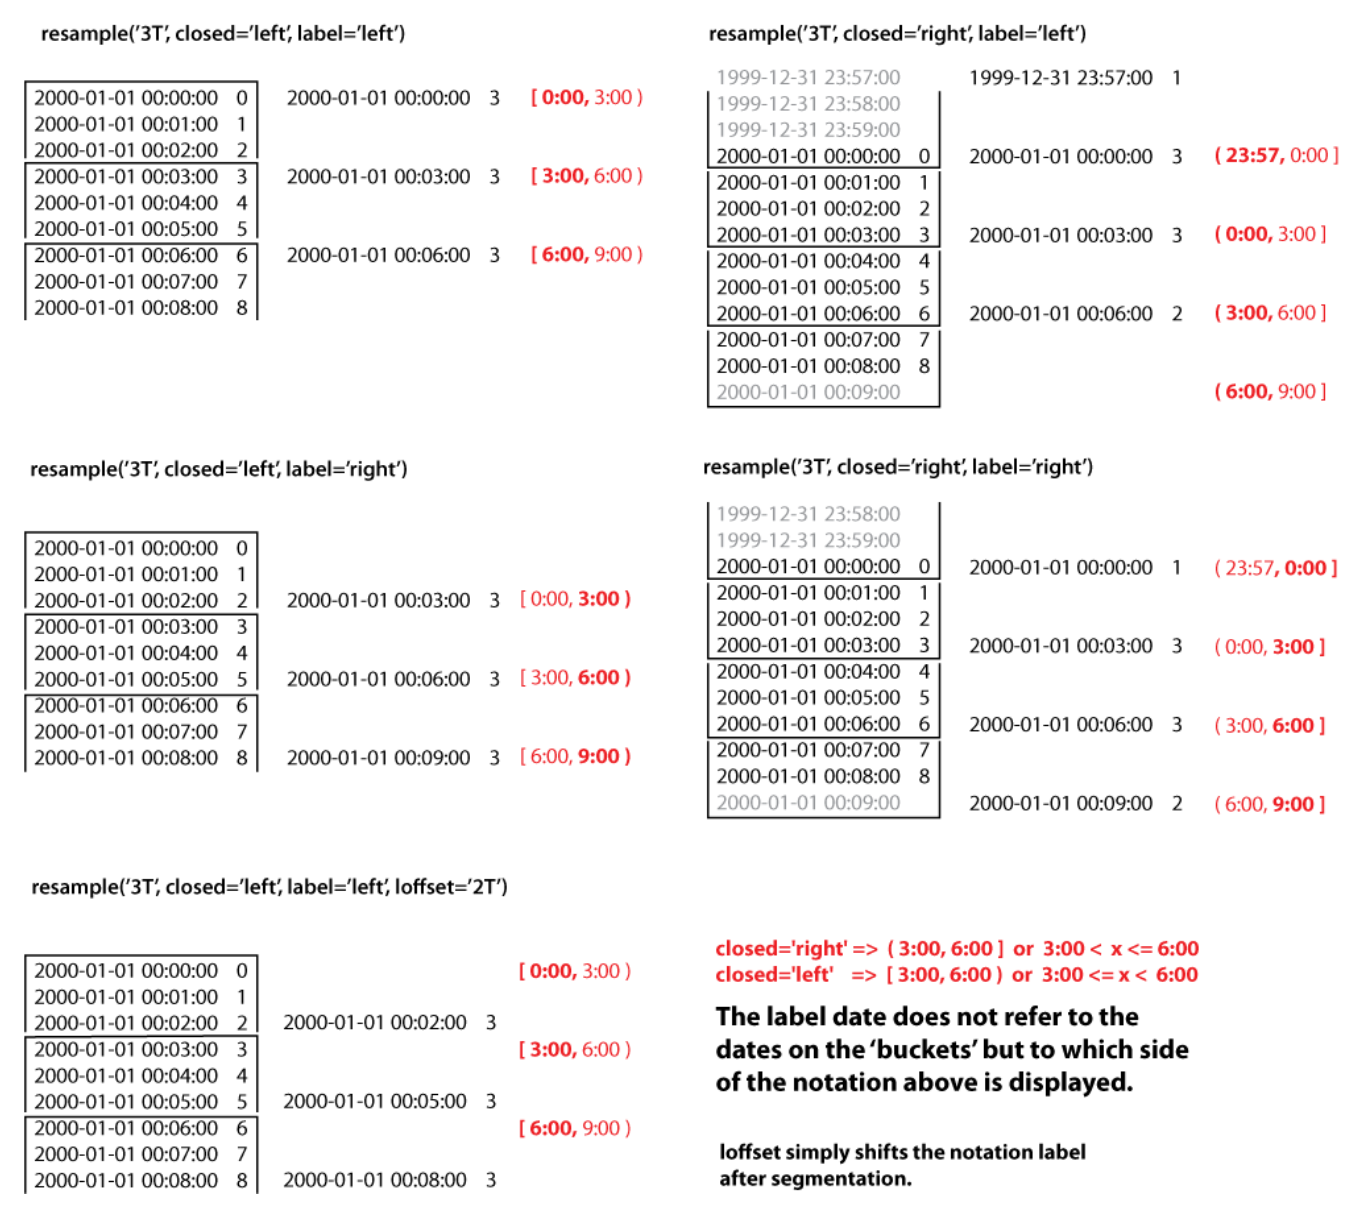
</div>

#### Open-High-Low-Close (OHLC) Resampling
In finance,  a popular way to aggregate a time series is to compute four values for each buckets: the first (open), last (close), maximum (high) and minimum (low) values. By using the `ohlc` aggregate function, you will obatin a DataFrame having columns containing these four aggregates

In [ ]:
ts.resample('5min').ohlc()

### Upsampling and Interpolation
When converting from a low frequency to a higher frequency, no aggregation is needed. Let's consider a DataFrame with some weekly data

In [ ]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index = pd.date_range('1/1/2000', periods = 2,
                                         freq = 'W-WED'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame

When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps. We use the `asfreq` method to convert to the higher frequency without any aggregation

In [ ]:
df_daily = frame.resample('D').asfreq()
df_daily

Suppose you wanted to fill forward each weekly value on the non-Wednesdays. The same filling or interpolation methods available in the `fillna` and `reindex` methods are available for resampling

In [ ]:
frame.resample('D').ffill()

You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value

In [ ]:
frame.resample('D').ffill(limit = 2)

Notably, the new date index need not overlap with the old one at all

In [ ]:
frame.resample('W-THU').ffill()

### Resampling With Periods
Resampling data indexed by periods is similar to timestamps

In [ ]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index = pd.period_range('1-2000', '12-2001',
                                           freq = 'M'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

In [ ]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

Upsampling is more nuanced as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the `asfreq` method. The `convention` option defaults to `start` but can also be `end`

In [ ]:
# Q-DEC: Quarterly, year ending in December
# default convention = start
annual_frame.resample('Q-DEC').ffill()

In [ ]:
annual_frame.resample('Q-DEC', convention = 'end').ffill()

Since periods refer to timespan, the rules about upsampling and downsampling are more rigid

- In downsampling, the target frequency must be a subperiod of the source frequency
- In upsampling, the target frequency must be a superperiod of the source frequency

If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annaully and weekly frequencies. For example, the timespans defined by `Q-MAR` only line up with `A-MAR`, `A-JUN`, `A-SEP` and `A-DEC`

In [ ]:
annual_frame.resample('Q-MAR').ffill()

### Moving Window Functions
An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights.. This can be useful for smoothing noisy data. Like other statistical functions, these functions also automatically exclude missing data. Before digging in, let's load up some time series data and resample it to business day frequency

In [ ]:
close_px_all = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv',
                           parse_dates = True, index_col = 0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

In [ ]:
close_px = close_px.resample('B').ffill()
close_px.head()

We now introduce the `rolling` method (provide rolling window calculations) which behaves similarly to `resample` and `groupby`. It can be called on a `Series` or ~DataFrame` along with a `window` option (expressed as a number of periods)

`DataFrame.rolling(window, min_periods = None, center = False, win_type = None, on = None, axis = 0, closed = None, method = 'single')`

- `window`: Size of the moving window. This is the number of observations used for calculating the statistic
- `min_periods`: Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, min_periods will default to 1. Otherwise, min_periods will default to the size of the window.

<div>
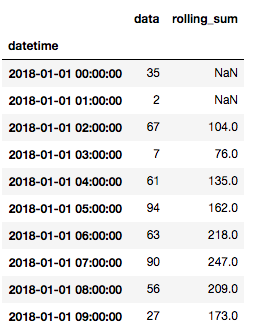
</div>

In [ ]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

The expression `rolling(250)` is similar in behavior to `groupby`, but instaed of grouping, it creates an object that enables grouping over 250-day sliding windows. So here we have the 250-day moving window average of Apple's stock price.

By default, rolling functions require all of the values in the window to be non-NA. This behavior can be changed to account for missing data and, in aprticular, the fact that you will have fewer than `window` periods of data at the beginning of the time series.

In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods = 10).std()
appl_std250[5:12]

In [ ]:
appl_std250.plot()

In order to compute an expanding window mean, use the `expanding` method instaed of `rolling`. The expanding means starts the time window from the beginning of the time series and increases the size of thw window until it encompasses the whole series

In [ ]:
expanding_mean = appl_std250.expanding().mean().plot()

Calling a moving window function on a `DataFrame` applies the transformation to each column

In [ ]:
close_px.rolling(60).mean().plot(logy = True)

The `rolling` function also accepts a string indicating fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to `resample`. For example, you can compute a 20-day rolling mean

In [ ]:
close_px.rolling('20D').mean().plot()

### Exponentially Weighted Functions
An alternative to use a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular one is using a span which makes the result comparable to a simple moving window function with window size equal to the span.

Pandas has the `ewm` method to go along with `rolling` and `expanding`. Here is an example comparing 60-day moving average of Apple's stock price with an EW moving average with `span = 60`

The accompanying `pandas-datareader` package (installable via `conda install pandas-datareader`), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others

In [ ]:
import matplotlib.pyplot as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods = 20).mean()
ewma60 = aapl_px.ewm(span = 30).mean()
ma60.plot(style = 'k--', label = 'Simple MA')
ewma60.plot(style = 'k-', label = 'EW MA')
plt.legend()

### Binary Moving Window Functions
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock's correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent for all of our time series of interest change

In [ ]:
spx_px = close_px_all['SPX'] # selct S&P
spx_rets = spx_px.pct_change() # calculate S&P percentage change
returns = close_px.pct_change() # # calculate other stocks percentage change

The `corr` aggregation function after we call `rolling` can then compute the rolling correlation with spx_rets

In [ ]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

In [ ]:
Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once.

In [ ]:
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

In [ ]:
conda install pandas-datareader

In [ ]:
from pandas_datareader import data
goog = data.DataReader('GOOG', 'yahoo', start = '2004-01-01', end = '2016-01-01').drop('Adj Close', axis = 1)
goog.head()

For simplicity, we'll use just the closing price

In [ ]:
goog = goog['Close']
goog.head()

We can visualize this using the `plot()` method

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [ ]:
goog.plot()

### Resampling and Converting Frequencies
One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year

In [ ]:
goog.plot(alpha=0.5, style='-', label = 'input')
goog.resample('BA').mean().plot(style=':', label = 'resample')
goog.asfreq('BA').plot(style='--', label = 'asfreq')
plt.legend(loc = 'upper left')

Notice the difference: at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.
    
For up-sampling, `resample()` and `asfreq()` are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with `NA` values. Just as with the `pd.fillna()` function discussed previously, `asfreq()` accepts a `method` argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends)

`DataFrame.asfreq(freq, method = None, how = None, normalize = False, fill_value = None)`

`method`: Method to use for filling holes in reindexed Series (note this does not fill `NaNs` that already were present):

- `pad / ffill`: propagate last valid observation forward to next valid
- `backfill / bfill`: use NEXT valid observation to fill.

In [ ]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax = ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax = ax[1], style = '-o', label = 'back-fill')
data.asfreq('D', method='ffill').plot(ax = ax[1], style = '--o', label = 'forward-fill')
ax[1].legend()

### Time-shifts
Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: `shift()` and `tshift()` In short, the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index. In both cases, the shift is specified in multiples of the frequency.
    
Here we will both `shift()` and `tshift()` by 900 days

In [ ]:
fig, ax = plt.subplots(3, 1, sharey = True)
fig.subplots_adjust(hspace = 0.8)

# apply a frequency to the data
goog = goog.asfreq('D', method = 'pad')

goog.plot(ax = ax[0])
goog.shift(900).plot(ax = ax[1])
goog.tshift(900).plot(ax = ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc = 2)
ax[0].get_xticklabels()[2].set(weight = 'heavy', color = 'red')
ax[0].axvline(local_max, alpha = 0.3, color = 'red')

ax[1].legend(['shift(900)'], loc = 2)
ax[1].get_xticklabels()[2].set(weight = 'heavy', color = 'red')
ax[1].axvline(local_max + offset, alpha = 0.3, color = 'red')

ax[2].legend(['tshift(900)'], loc = 2)
ax[2].get_xticklabels()[1].set(weight = 'heavy', color = 'red')
ax[2].axvline(local_max + offset, alpha = 0.3, color = 'red')

In [ ]:
goog.shift(900)

In [ ]:
goog.tshift(900)

We see here that `shift(900)` shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while `tshift(900)` shifts the index values by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset

In [ ]:
goog.tshift(-365)

In [ ]:
goog

In [ ]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession

### Rolling Windows
Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the `rolling()` attribute of `Series` and `DataFrame` objects, which returns a view similar to what we saw with the `groupby` operation. This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices

In [ ]:
rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Case Study: Website Log Analysis

In [ ]:
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
data_dir = './Blog Access Log'


# read all fiev files inside Blog Access Log directory and combine them into a DataFrame
df_list = []

for fname in os.listdir(f'{data_dir}'):
    df_list.append(pd.read_csv(f'{data_dir}/{fname}', sep = ' ', header = None, error_bad_lines = False))

df = pd.concat(df_list)

In [ ]:
df.head()

In [ ]:
# select IP, Time, Status, Client columns
df = df[[0, 3, 6, 9]].copy()
df.head()

In [ ]:
# rename the column names
df.columns = ['IP', 'Time', 'Status', 'Client']
df.head()

In [ ]:
# check the data type
df.dtypes

In [ ]:
df["Is_Spider"] = df["Client"].str.lower().str.contains("spider")
df.head()

In [ ]:
df_spider = df['Is_Spider'].value_counts()
df_spider

In [ ]:
sns.barplot(x = ['Not Spider', 'Spider'], y = df_spider)
plt.ylabel('Visits')

In [ ]:
df_status = df.groupby('Status').size()
df_status

In [ ]:
df['Status'].value_counts()

In [ ]:
plt.figure(figsize = (10, 6))
plt.pie(df_status, labels = df_status.index)
plt.show()

In [ ]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['Time'] = pd.to_datetime(df['Time'].str[1:], format = '%d/%b/%Y:%H:%M:%S')
df.head()

In [ ]:
# set Time column to be teh DataFrame's index
df.set_index('Time', inplace = True)
df.sort_index(inplace = True)
df.head()

In [ ]:
df.index

In [ ]:
# analyze pv, uv by hour
df_pvuv = df.resample('H')['IP'].agg(pv = np.size, uv = pd.Series.nunique)
df_pvuv.head()
df_pvuv.plot()

In [ ]:
# analyze pv, uv by every 6 hours
df_pvuv = df.resample('6H')['IP'].agg(pv = np.size, uv = pd.Series.nunique)
df_pvuv.head()
df_pvuv.plot()

In [ ]:
# analyze pv, uv by every day
df_pvuv = df.resample('D')['IP'].agg(pv = np.size, uv = pd.Series.nunique)
df_pvuv.head()
df_pvuv.plot()